# Titrationskurven

Idee unter pH 7:Menge der H+ in der Lösung n(H+) = durch Reaktion der Säure freigesetzte + in Autoprotolyse entstandene - durch zugegebenes OH vernichtete

also:  H (vProbe+vTitrans) = abgegebeneProtonen * (vProbe+vTitrans) + OH * (vProbe+vTitrans) - cTitrans * vTitrans

also aufgelöst nach vTitrans: 
        
über pH 7:Menge der OH- in der Lösung n(OH-) = zugegebene OH- - durch Reaktion mit Säure vernichtete +  in Autoprotolyse entstandene
also:  OH * (vProbe+vTitrans) = cTitrans * vTitrans - abgegebeneProtonen * (vProbe+vTitrans) + 
diese Formel gibt nach H (vProbe+vTitrans) aufgelöst genau dasselbe wie die obige Formel, sie gilt also für alle pH-Bereich, auch bei 7 (wo sich H und OH genau aufheben)
        
allerdings verkleinert sich mit zunehmender Verdünnung auch c0. Es wird zu c0 * vProbe /(vProbe+vTitrans). Um diesen Faktor muss man noch korrigieren.Also gitl
H (vProbe+vTitrans) = abgegebeneProtonen * (vProbe) + OH * (vProbe+vTitrans) - cTitrans * vTitrans
    
ctitrans muss durch erzeugte OH ersetzt werden, wenn mehrprotoniges oder schwaches Titrans verwendet wird. 

In [2]:
import sys
stdout = sys.stdout
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import sympy as sp
import mpmath as mp
a_ = sp.Symbol('a_')
b_ = sp.Symbol('b_')
x_ = sp.Symbol('x_')
import time

In [3]:
#angezeigter Bereich
xmin=0
xmax=20
ymin=1
ymax=13 
ymax_spez = 0.05 

mehrereplots = False

#wenn hier auf False gestellt wird, wird die Tiration eine Base dargestellt. pK-Werte sind dann pKB-Werte
TitrationSaure = True

verduennt = True
"""
variante = 0 logarithmisch und linear
variante = 1 nur logarithmisch (Titrationskurve)
variante = 2 nur linear
variante = 3: kurven für verschiedene pKS-Werte, ansonsten identisch
Variante = 4: pks = 2, verschiedene Konzentrationen, sonst identisch

variante = 10: Vergleich mit / ohne Verdünnung
"""
variante = 0

# mit True wird berücksichtigt, dass das Volumen der PRobe beim Titrieren zunimmt.
# verduennt = True. Ist nun aber bei den Kurven eingepflegt
# Konzentration und pKs der Probe in Listen, damit mehrere Säuren zugegeben werden können. Die erste muss die schwache sein.

# Lösung einer bestimmten Masse an Probe in einer bestimmten Menge Wasser
m_probe = 16 
V_loesung = 1 # Liter, sonst immer mL
M_probe = 137.1

cProbe = [.1]
cProbe =  [m_probe/M_probe/V_loesung]
#cProbe = [.14]

vProbe = 40
cTitrans = 1

print("cProbe",cProbe)

cProbe [0.11670313639679067]


pKS-Werte der Säure bzw. pKB-Werte der BAse

einprotonig:
pK = np.array([[6,100,100]])
ist dasselbe wie 
pK = [[6,100,100]]
Es bedeutet: der erste pKS ist 6, die anderen sind so gross, dass sie keine Rolle spielen (nämlich 100)

Säure mit den pks-Werte 2,7 und 10:
pK = np.array([[2,7,10]])

HClO mit wenig Salzsäure
pK = np.array([[6.46,100,100], [-2,100,100]])


In [14]:
# zweiter Sprung kaum sichtbar
pK = np.array([[5,100,100]])
pK = [[3.0,4.5]] # Fumarsäure  (E)-Butendisäure
pK = [[2.89, 4.4]] # + oder - Weinsäure
pK = [[3.22,4.85]] # meso Weinsäure
pK = [[1.23,4.19]]  # Oxalsäure
pK = [[3.13,4.76,6.4]]   # Zitronensäure
pK = [[2.22,3.89,13.03]] # Oxalessigsäure. Das letzte Proton stammt aus der CH2-Gruppe
pK = [[3.46,5.1]] # Äpfelsäure
pK = [[2.80,4.46]] # trans-Aconitinsäure

# zweiter Sprung sichtbar
# Aminosäuren!!!
pK = [[1.93,6.58]] # Maleinsäure Z-Butendisäure
pK = [[3.89,11]] # H2Se
pK = [[2.64,11]] # H2Te
pK = [[2.7,8.0]] # H2TeO3
pK = [[6.2,8.8]] # Te(OH)6
pK = [[2.6,8.3]] # H2SeO3 
pK = [[2.22,7,13]] # H3AsO4
pK = np.array([[1.96,7.2, 100]]) # schweflige Säure 
pK = np.array([[7.2, 100, 100]])
pK = [[1.96,7.21,12.32]]  # Phosphorsäure
pK = [[2.35,9.78]]  # Kohlensäure


pK = [[9.31]]
pK = [[3.89,11]]
pK = [[4.87]]
pK = [[1.96,7.21,12.32]]  # Phosphorsäure
pK = [[1.8,6.04,9.33]]  # Histidin

plottitel = "Histidin"

spezieslabels = [r"$H_3PO_4$", r"$H_2PO_4^-$",r"$HPO_4^{2-}$",r"$PO_4^{3-}$", r"$CCl_3COOH$", "$CCl_3COO^-$", "c", "d", "e", "f", "g", "h"]
spezieslabels = [r"$H_2CO_3$", r"$HCO_3^-$",r"$CO_3^{2-}$","f", "g", "h"]
spezieslabels = [r"HA", r"$A^-$",r"$CO_3^{2-}$","f", "g", "h"]

"""
# Phosphorsäue mit Trichloressigsäure
cProbe = [0.06, 0.11]
pK = [[1.96, 7.21,12.32], [0.52]]
"""



#für pKTitrans bei der Titration einer Säure durch eine BAse pKB-Werte verwenden, sonst pKS
#zweiprotonig
pKtitrans = np.array([-7,6,100])
#dreiprotonig
pKtitrans = np.array([-7,4,11])
#einprotonig
pKtitrans = np.array([-10,100,100])



Anfangs- Ozonium-Konz und pH-Werte: 
Wird für die Plots *nicht* benötigt
Starke Säure: 0.11670313639679067 mol/L; pH =  0.9329174721335879
[H3O+] Schwache Säure solveset: {-0.0516556587762351, 0.035806726851624} mol/L
 pH =  1.286882095428445
 pH =  1.4460353767051428
[H3O+] Schwache Säure numerisch: 0.0358067268516240 mol/L; 
 pH =  1.4460353767051428

 äquivalenzpunkt: Hydroxid-Konz und pH-Werte
[OH-] Schwache Säure solveset: {-2.71357462120378e-7, 2.71356831163034e-7} mol/L
 pOH =  6.566458231157863
 pH =  7.433541768842137
 pOH =  6.566459240975724
 pH =  7.433540759024276

[OH-] Schwache Säure numerisch: 2.72299672101252e-7 mol/L; 
 pH =  7.435047118370069


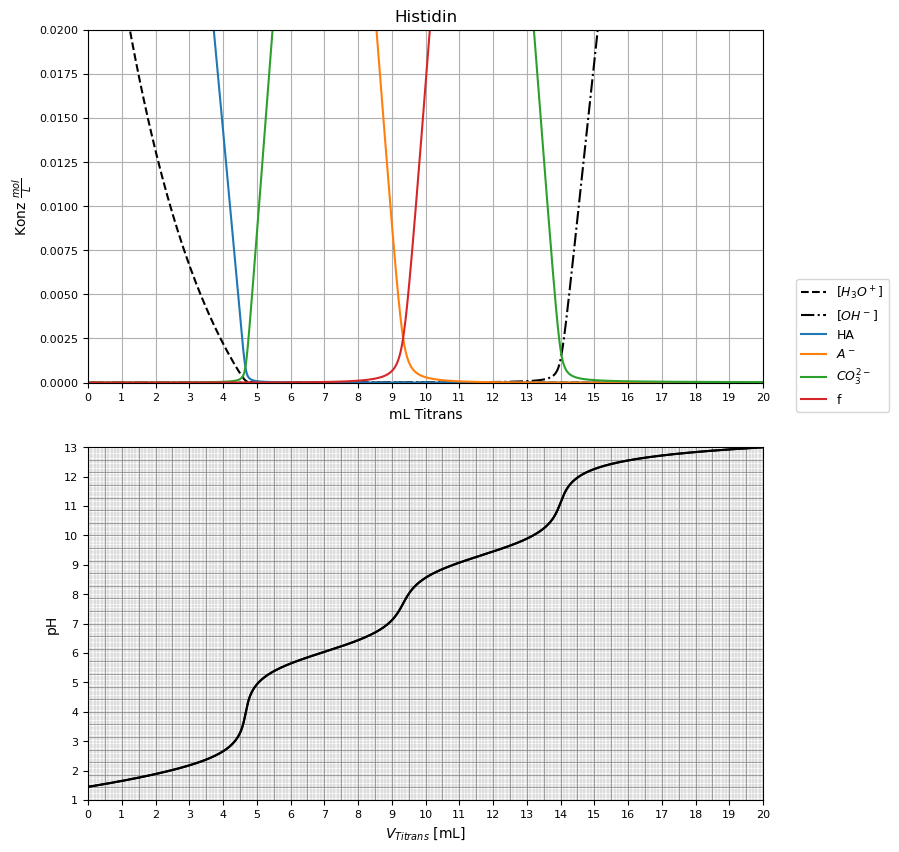

In [15]:
prop_cycle = plt.rcParams['axes.prop_cycle']
farben = prop_cycle.by_key()['color']

aspectratio = 5


def setAx(ax,xmin=0.0,xmax=20,ymin=0.0,ymax=14,xlabel="", ylabel="pH", aspect=1, yticks=10,xticks=20):
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([xmin,xmax])
    #ax.set_xticks(np.arange(xmin, xmax+1, 1.0))
    ax.set_xticks(np.arange(xmin, xmax+1, 1.0))
    ax.set_yticks(np.arange(ymin, ymax+1, 1.0))
    ax.tick_params(axis='both', which='major', labelsize=8)
    if xlabel != "":
        ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #ax.set_aspect(aspect)
    
    #grober
    """
    for i in range(5*yticks+1):
            ax.plot([xmin,xmax],[i*(ymax-ymin)/yticks/5+ymin,i*(ymax-ymin)/yticks/5+ymin],'k-', lw = 0.2, color='grey')
    for i in range(yticks+1):
            ax.plot([xmin,xmax],[i*(ymax-ymin)/yticks+ymin,i*(ymax-ymin)/yticks+ymin],'k-', lw = 0.5, color='grey')
    for i in range(5*xticks+1):
            ax.plot([i/5+xmin,i/5+xmin],[ymin,ymax],'k-', lw = 0.2, color='grey')
    for i in range(xticks+1):
            ax.plot([i+xmin,i+xmin],[ymin,ymax],'k-', lw = 0.5, color='grey')
     
    """
    #feiner        
    for i in range(10*yticks+1):
            ax.plot([xmin,xmax],[i*(ymax-ymin)/yticks/10+ymin,i*(ymax-ymin)/yticks/10+ymin],ls = '-', lw = 0.2, color='grey')
    for i in range(2*yticks+1):
            ax.plot([xmin,xmax],[i/2*(ymax-ymin)/yticks+ymin,i/2*(ymax-ymin)/yticks+ymin],ls = '-', lw = 0.5, color='grey')
    for i in range(10*xticks+1):
            ax.plot([i/10+xmin,i/10+xmin],[ymin,ymax],ls = '-', lw = 0.2, color='grey')
    for i in range(2*xticks+1):
            ax.plot([i/2+xmin,i/2+xmin],[ymin,ymax],ls = '-', lw = 0.5, color='grey')     

fig = plt.figure(figsize=[10,10])
if variante in [0,3,4]:
    
    grid = plt.GridSpec(4, 4, hspace=0.45, wspace=0.2, right=0.8)
    ax = fig.add_subplot(grid[2:, :4])
    ax1 = fig.add_subplot(grid[:2, :4], xticks=[])
    setAx(ax,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=xmax,yticks=14)
    ax1_label = ""
    
elif variante in [1,10]:
    ax = fig.add_subplot()
    
    
else:
    ax1 = fig.add_subplot()
    ax1_label = "$V_{Titrans}$ [mL]"
    
if variante == 1:
    setAx(ax,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=xmax,yticks=ymax-ymin)
    
if variante in [0,2,3,4]:
    ax1.set_xlim([xmin,xmax])
    ax1.set_xticks(np.arange(xmin, xmax+1, 1.0))
    ax1.set_xlabel(ax1_label)
    ax1.set_ylabel(r"Konz $\frac{mol}{L}$")
    ax1.tick_params(axis='both', which='major', labelsize=8)
    ax1.set_ylim([0,ymax_spez])













class titrationskurve():
    def __init__(self,pK=[[0,5,10]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = False,farbe='k',linestyle='-', label="A"):
        self.pK = pK    
        self.pKtitrans = np.array(pKtitrans)
        self.cProbe = cProbe
        self.cTitrans = cTitrans
        self.vProbe = vProbe
        self.n_points = 1000
        self.pH = np.linspace(0,14,self.n_points)
        self.H = 10**-self.pH
        self.OH = 10**-14/self.H
        self.verduennt = verduennt
        self.linestyle = linestyle
        self.farbe = farbe
        self.label = label

        self.anfangs_pH()
        
        #für allgemeinere Lösung
        self.abgegebeneProtonen = np.zeros(self.n_points)
        self.alle_saeure_spezies = []
        
        
        
        for i in range(len(pK)):
            self.speziierung_HA(self.pK[i], self.cProbe[i])
        

        self.speziierung_Titrans()
        

        if self.verduennt == False:
            self.cTitrans = self.erzeugteOH
            self.vTitrans = self.vProbe * (self.OH + self.abgegebeneProtonen - self.H) / self.cTitrans
        else:
            self.cTitrans = self.erzeugteOH
            # ergibt daraus, dass Autoprotolyse immer genau gleich viel H wie OH liefert
            # der Unterschied von H und OH in der Probe in mol (Vt + Vp)*(H-OH) muss also gleich gross sein wie der Unterschied
            # zwischen hinzugefügten H (H_abgegeben * Vp) und zugefügten OH (ct * Vt) in mol. 
            # (Vt + Vp)*([H]-[OH]) = H_abgegeben * Vp - (ct * Vt)
            # Vt * ([H]-[OH]) + Vt*ct = Vp* (H_abgegeben - [H]+[OH]) 
            # Vt ([H]-[OH] + ct) = Vp* (H_abgegeben - [H]+[OH]) 
            # Vt  = Vp* (H_abgegeben - [H]+[OH]) / ([H]-[OH]-ct)
            self.vTitrans = self.vProbe * (self.OH + self.abgegebeneProtonen - self.H) / (self.cTitrans+self.H-self.OH)
            #falsche Werte abfangen.
            self.imax = 0
            for i in range(len(self.vTitrans)-1):
                if self.vTitrans[i+1] > self.vTitrans[i]:
                    self.imax = i
                else: 
                    #print(self.vTitrans[i-1],self.vTitrans[i],self.vTitrans[i+1],self.vTitrans[i+2])
                    break


    def plotten(self):
        if self.verduennt == False:
            if TitrationSaure == True:
                ax.plot(self.vTitrans,self.pH,ls=self.linestyle, color=self.farbe, label = self.label)
            else: 
                ax.plot(self.vTitrans,14-self.pH,ls=self.linestyle, color=self.farbe, label = self.label)
 
        else:
            if TitrationSaure == True:
                ax.plot(self.vTitrans[:self.imax],self.pH[:self.imax],ls=self.linestyle, color=self.farbe, label = self.label)
            else: 
                ax.plot(self.vTitrans,14-self.pH,ls=self.linestyle, color=self.farbe, label = self.label)


        
    

        
    
    def speziierung_allg(self, pK, c0):
        K = 10.0**-np.array(pK)
        f = [K[i]/self.H for i in range(len(K))] 
        #erste Spezies ist die am meisten protonierte, zweite ist die am zweitmeisten, ...
        spezies_gewichtung = np.ones(len(f[0])*(len(f)+1)).reshape(len(f)+1, -1)
        zustandssumme = 1
        
        for i in range(1,len(f)+1):
            spezies_gewichtung[i,:] = spezies_gewichtung[i-1,:]*f[i-1]
        spezies_gewichtung = np.array(spezies_gewichtung)
        zustandssumme = np.sum(spezies_gewichtung, axis = 0)
        spezies_r = spezies_gewichtung/zustandssumme

        spezies = spezies_r * c0
        
        H_uebertragen = np.zeros(len(spezies_r[0]))      #H_uebertragen sind entweder abgegebene H+ oder aufgeneommene H+ = erzeugte OH-
        for i in range(len(spezies_r)):
             H_uebertragen += spezies[i] *i
        
        return spezies, H_uebertragen
         
    
    def speziierung_HA(self, pK,c0):
        #bei der Titration einer Base sind dies Basenspezies: H3A ist dann B, H2A ist HB etc. 
        """
        K = 10.0**-pK
        # ausführlicher Formalismus, der die Berechnung zeigt:
        #relativer Anteil H3A = 1
        f0 = K[0]/self.H
        f1 = K[1]/self.H
        f2 = K[2]/self.H
        zustandssumme = 1 + f0 + f0*f1 + f0* f1 * f2

        H3A_r = 1/zustandssumme
        H2A_r = 1/zustandssumme * f0
        HA_r = 1/zustandssumme * f0* f1
        A_r = 1/zustandssumme * f0* f1 * f2

        self.H3A = H3A_r * c0
        self.H2A = H2A_r * c0
        self.HA = HA_r * c0
        self.A = A_r * c0
        self.abgegebeneProtonen = self.H2A + 2* self.HA + 3*self.A 
        
        """
        
        #Allgemeinerer Formalismus, der beliebig viele pKS-Werte erlaubt, aber genau gleich rechnet wie oben
        saeure_spezies, abgegebene_H = self.speziierung_allg(pK, c0) 
        self.abgegebeneProtonen += abgegebene_H
        self.alle_saeure_spezies.append(saeure_spezies)
    
    def speziierung_Titrans(self): 
        """
        K = 10.0**-self.pKtitrans
        
        # ausführlicher Formalismus, der die Berechnung zeigt:
        #relativer Anteil H3A = 1
        f0 = K[0]/self.OH
        f1 = K[1]/self.OH
        f2 = K[2]/self.OH
        zustandssumme = 1 + f0 + f0*f1 + f0* f1 * f2
        
        B_r = 1/zustandssumme
        HB_r = 1/zustandssumme * f0
        H2B_r = 1/zustandssumme * f0* f1
        H3B_r = 1/zustandssumme * f0* f1 * f2
        
        self.B = B_r * self.cTitrans
        self.HB = HB_r * self.cTitrans
        self.H2B = H2B_r * self.cTitrans
        self.H3B = H3B_r * self.cTitrans
        self.erzeugteOH = self.HB + 2* self.H2B + 3 * self.H3B 
        """
        
        #Allgemeinerer Formalismus, der beliebig viele pKS-Werte erlaubt, aber genau gleich rechnet wie oben
        self.titrans_spezies, self.erzeugteOH = self.speziierung_allg(self.pKtitrans, self.cTitrans)         


    # was nun folgt, wird für die Berechnung nicht benötigt
    def anfangs_pH(self):
        print("Anfangs- Ozonium-Konz und pH-Werte: ")
        print("Wird für die Plots *nicht* benötigt")
        print("Starke Säure:", self.cProbe[0],"mol/L; pH = ",-np.log10(self.cProbe[0]))

        K = 10.0**-(self.pK[0][0])
        c0 = self.cProbe[0]
        eq = x_*x_/(c0-x_) - K 
        try:
            res1 = sp.solveset(eq)
            print("[H3O+] Schwache Säure solveset:",res1,"mol/L")
        except: 
            try:
                res1 = sp.solve(eq)
                print("[H3O+] Schwache Säure solve:",res2,"mol/L")
            except: 
                res1 = "keine analytische Lösung" 
                
        try:
            for r in res1:
                print(" pH = ", -np.log10(abs(float(r))))
        except:
            print("pH konnte nicht berechnet werden")
            
 
        try:
            res3 = sp.nsolve(eq.as_numer_denom()[0], x_, self.cProbe[0]*0.9)
            pH3 = -np.log10(abs(float(res3)))
        except: 
            res3 = "keine Lösung"
            pH3 = "keine Lösung"
        print("[H3O+] Schwache Säure numerisch:",res3,"mol/L; \n pH = ", pH3)
        
        print("\n äquivalenzpunkt: Hydroxid-Konz und pH-Werte")
        K = 10.0**(-14+(self.pK[0][0]))
        c0 = self.cProbe[0]
        eq = x_*x_/(c0-x_) - K 
        try:
            res1 = sp.solveset(eq)
            print("[OH-] Schwache Säure solveset:",res1,"mol/L")
        except: 
            try:
                res1 = sp.solve(eq)
                print("[OH-] Schwache Säure solve:",res2,"mol/L")
            except: 
                res1 = "keine analytische Lösung" 
                
        try:
            for r in res1:
                print(" pOH = ", -np.log10(abs(float(r))))
                print(" pH = ", 14+np.log10(abs(float(r))))
        except:
            print("pH konnte nicht berechnet werden")
            
        print()  
        try:
            res3 = sp.nsolve(eq.as_numer_denom()[0], x_, self.cProbe[0]*0.9)
            pOH3 = 14+np.log10(abs(float(res3)))
        except: 
            res3 = "keine Lösung"
            pOH3 = "keine Lösung"        
        print("[OH-] Schwache Säure numerisch:",res3,"mol/L; \n pH = ", pOH3)
"""
pK = np.array([[7.2, 100, 100]])
cTitrans = 0.1
cProbe = [0.0341]
vProbe = 50
t1 = titrationskurve(pK=pK,pKtitrans=pKtitrans,cProbe=cProbe,cTitrans=cTitrans,vProbe=vProbe, verduennt = False,farbe='k',linestyle='-')   
t2 = titrationskurve(pK=np.array([[4.19,100,100]]),pKtitrans=pKtitrans,cProbe=cProbe,cTitrans=cTitrans,vProbe=vProbe, verduennt = False,farbe='k',linestyle='-')   

t1 = titrationskurve(pK=[[7.4,100,100]],pKtitrans=[-10,100,100],cProbe=[0.055],cTitrans=0.3,vProbe=25, verduennt = True,farbe='k',linestyle='--', label = "A")  
t2 = titrationskurve(pK=[[7.2,100,100]],pKtitrans=[-10,100,100],cProbe=[0.117],cTitrans=0.3,vProbe=25, verduennt = True,farbe='g',linestyle='-', label = "B") 
t3 = titrationskurve(pK=[[4.76,100,100]],pKtitrans=[-10,100,100],cProbe=[0.23],cTitrans=1.0,vProbe=50, verduennt = True,farbe='b',linestyle='-', label = "C")    
t4 = titrationskurve(pK=[[4.19,100,100]],pKtitrans=[-10,100,100],cProbe=[0.72],cTitrans=1.0,vProbe=20, verduennt = True,farbe='c',linestyle='-', label = "D")    
t5 = titrationskurve(pK=[[3.75,100,100]],pKtitrans=[-10,100,100],cProbe=[0.031],cTitrans=0.2,vProbe=100, verduennt = False,farbe='r',linestyle='-', label = "E")    
t6 = titrationskurve(pK=[[3.14,100,100]],pKtitrans=[-10,100,100],cProbe=[0.35],cTitrans=1,vProbe=50, verduennt = False,farbe='k',linestyle='-.', label = "F")
t7 = titrationskurve(pK=[[0,100,100]],pKtitrans=[-10,100,100],cProbe=[0.12],cTitrans=0.1,vProbe=15, verduennt = False,farbe='k',linestyle='-', label = "G")
t8 = titrationskurve(pK=[[0,100,100]],pKtitrans=[-10,100,100],cProbe=[0.14],cTitrans=0.1,vProbe=14, verduennt = False,farbe='k',linestyle=':', label = "H")
"""


t_1 = titrationskurve(pK=pK,pKtitrans=pKtitrans,cProbe=cProbe , verduennt = verduennt, cTitrans=cTitrans,vProbe= vProbe,farbe='k',linestyle='-')   
#t_2 = titrationskurve(pK=[[-6]],pKtitrans=pKtitrans,cProbe=cProbe , verduennt = verduennt, cTitrans=cTitrans,vProbe= vProbe,farbe='k',linestyle='-')   
t_1.plotten()
#t_2.plotten()



if variante < 2:
    t_1.plotten()
    ax.set_xlabel("$V_{Titrans}$ [mL]")
    
if variante in [0,2]:
    index1 = np.where(t_1.vTitrans>0)[0][0]
    ax1.plot(t_1.vTitrans[index1:], np.array(10**-t_1.pH)[index1:],'k--', label=r"$[H_3O^+]$")
    ax1.plot(t_1.vTitrans[index1:], np.array(10**(t_1.pH-14))[index1:],'k-.', label=r"$[OH^-]$")
    # vergleich unverdünnt verdünnt
    #ax1.plot(t_2.vTitrans[index1:], np.array(10**-t_2.pH)[index1:],'k--', lw = 0.3, label=r"$[H_3O^+] ohne Verdünnung$")
    #ax1.plot(t_2.vTitrans[index1:], np.array(10**(t_2.pH-14))[index1:],'k-.',lw = 0.3,  label=r"$[OH^-] ohne Verdünnung$")    
    
    farben = ["b", "orange", "g", "r"]
    farben = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
    zaehler = 0
    for j in range(len(t_1.alle_saeure_spezies)):
        for i in range(len(t_1.alle_saeure_spezies[j])):
                ax1.plot(t_1.vTitrans[index1:], np.array(t_1.alle_saeure_spezies[j][i])[index1:], color=farben[zaehler],label=spezieslabels[zaehler])   
                zaehler += 1

    #passend zur ausführlichen Berechnungsmethode:
    """
    ax1.plot(t1.vTitrans[index1:], np.array(t1.H3A)[index1:], color="b",label=r"$H_3PO_4$")
    ax1.plot(t1.vTitrans[index1:], np.array(t1.H2A)[index1:], color="orange", label=r"$H_2PO_4^-$")
    ax1.plot(t1.vTitrans[index1:], np.array(t1.HA)[index1:], color="g", label=r"$HPO_4^{2-}$")
    ax1.plot(t1.vTitrans[index1:], np.array(t1.A)[index1:], color="r", label=r"$PO_4^{3-}$")
    """
    
    ax1.grid()
    ax1.legend(loc="lower left",bbox_to_anchor=(1.04,-0.1),fontsize=9)
    ax1.set_ylim([0,0.02])
    ax1.set_xlabel("mL Titrans")

# verschiedene pKS-werte von schwach bis stark
if variante == 3:
    tks = []
    tks.append(titrationskurve(pK=[[-1,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = True,farbe='k',linestyle='--', label = "pKs = -1")) 
    tks.append(titrationskurve(pK=[[0,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = True,farbe='g',linestyle='-', label = "pKs = 0") )
    tks.append(titrationskurve(pK=[[1,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = True,farbe='b',linestyle='-', label = "pKs = 1")    )
    tks.append(titrationskurve(pK=[[2,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = True,farbe='c',linestyle='-', label = "pKs = 2")    )
    tks.append(titrationskurve(pK=[[3,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = False,farbe='r',linestyle='-', label = "pKs = 3")   ) 
    tks.append(titrationskurve(pK=[[4,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = False,farbe='r',linestyle='-', label = "pKs = 4")   ) 
    for t in tks:
        index1 = np.where(t.vTitrans>0)[0]
        # einen Index davor noch dazunehmen, damit Kurve vo 0 beginnen:
        index1 = np.concatenate((np.array([index1[0]-1]),index1))
        ax1.plot(t.vTitrans[index1], np.array(10**-t.pH)[index1],label=t.label)
        ax.plot(t.vTitrans[index1], t.pH[index1],label=t.label)
    ax.legend()
    ax1.legend()

if variante == 4:
    tks = []
    tks.append(titrationskurve(pK=[[3,100,100]],pKtitrans=[-10,100,100],cProbe=[1],cTitrans=10,vProbe=100, verduennt = True,farbe='k',linestyle='--', label = "cP = 1 mol/L")) 
    tks.append(titrationskurve(pK=[[3,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=1,vProbe=100, verduennt = True,farbe='g',linestyle='-', label = "cP = 0.1 mol/L") )
    tks.append(titrationskurve(pK=[[3,100,100]],pKtitrans=[-10,100,100],cProbe=[0.01],cTitrans=0.1,vProbe=100, verduennt = True,farbe='b',linestyle='-', label = "cP = 0.01 mol/L")    )
    for t in tks:
        index1 = np.where(t.vTitrans>0)[0]
        # einen Index davor noch dazunehmen, damit Kurve vo 0 beginnen:
        index1 = np.concatenate((np.array([index1[0]-1]),index1))
        ax1.plot(t.vTitrans[index1], np.array(10**-t.pH)[index1],label=t.label)
        ax.plot(t.vTitrans[index1], t.pH[index1],label=t.label)
    ax.legend()
    ax1.legend()



if variante == 10:
    xmin=0
    xmax=30
    ymin=0
    ymax=14
    ymax_spez = 0.05 
    # vergleich mit/ohne verdünnung
    tks = []
    tks.append(titrationskurve(pK=[[3,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=0.5,vProbe=50, verduennt = True,farbe='g',linestyle='-', label = "Volumenänderung berücksichtigt") )
    tks.append(titrationskurve(pK=[[3,100,100]],pKtitrans=[-10,100,100],cProbe=[0.1],cTitrans=0.5,vProbe=50, verduennt = False,farbe='r',linestyle='-', label = "Volumenänderung nicht berücksichtigt") )

    farben = ["r","b"]
    for t, farbe in zip(tks,farben):
        index1 = np.where(t.vTitrans>0)[0]
        # einen Index davor noch dazunehmen, damit Kurve vo 0 beginnen:
        index1 = np.concatenate((np.array([index1[0]-1]),index1))
        #♣ax1.plot(t.vTitrans[index1], np.array(10**-t.pH)[index1],label=t.label)
        ax.plot(t.vTitrans[index1], t.pH[index1],label=t.label,color=farbe)
    setAx(ax,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=xmax,yticks=ymax-ymin)
    ax.legend()


"""
#Pufferkurven
pHpu = np.linspace(ymin,ymax,500)
pu=[]
zorder = -1
farben = ['lightblue','navajowhite','lightgreen','mistyrose']
if len(pK[0]) > len(farben):
    farben = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
for i in range(len(pK[0])):
    pKpu = pK[0][i]
    pu.append(10**(pHpu-pKpu)/(1+10**(pHpu-pKpu)))
    ax2.plot(pu[-1],pHpu)
    ax2.fill_between(pu[-1],pHpu,color=farben[i], zorder = zorder)
    zorder -= 1
    
ax2.fill_between(pu[-1],14,color=farben[3], zorder = zorder)

#stimmt bei höchstem und tiefstem pKs nicht!
index1=[]
for i in range(len(pK[0])):
    pK_ = pK[0][i]
    index1.append(np.where(t1.pH>pK_)[0][0])
    if i in [0,1,2]:
        ax.plot([t1.vTitrans[index1[-1]],40],[pK_,pK_],'k:', clip_on=False)
        ax2.plot([-1,0.5],[pK_,pK_],'k:', clip_on=True)
        ax.plot([t1.vTitrans[index1[-1]],t1.vTitrans[index1][-1]],[pK_,-3],'k:', clip_on=False)
        ax1.plot([t1.vTitrans[index1[-1]],t1.vTitrans[index1][-1]],[.05,1],'k:', clip_on=True) 


#zusätzliche Linien *genau* in der Mitte des Pufferbereichs, wenn es also keine Rückreaktionen gäbe
zusatzlinien = False
if zusatzlinien == True:
    for pH_,v_, v1_ in [[pK[0][0],5,t1.vTitrans[index1[0]]],[pK[0][2],25,t1.vTitrans[index1[2]]]]:
        #v1_ = 40
        ax.plot([v_,v1_],[pH_,pH_],'k:', clip_on=False)
        ax2.plot([-1,0.5],[pH_,pH_],'k:', clip_on=True)
        ax.plot([v_,v_],[pH_,-3],'k:', clip_on=False)
        ax1.plot([v_,v_],[.05,1],'k:', clip_on=True)    
  
    
    
ax2.text(0.5,0.7,r'$H_3PO_4$',horizontalalignment="center",verticalalignment="center")
ax2.text(0.5,4.59,r'$H_2PO_4^-$',horizontalalignment="center",verticalalignment="center")
ax2.text(0.5,9.77,r'$HPO_4^{2-}$',horizontalalignment="center",verticalalignment="center")
ax2.text(0.5,13.3,r'$PO_4^{3-}$',horizontalalignment="center",verticalalignment="center")

ax2.grid()
"""  

plt.title(plottitel)
#plt.savefig("Titrationskurve",dpi=300 )   
plt.show()